In [1]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# Lets see what is in the Data
df=pd.read_csv(r"C:\Users\neeth\OneDrive\文档\5th sem\AIML\PROJECT\Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Droping the useless column 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)

In [4]:
# A Quick Information abou the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [5]:
# Stastical Description of Data
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
# Size of the data 
df.shape

(300153, 11)

In [7]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

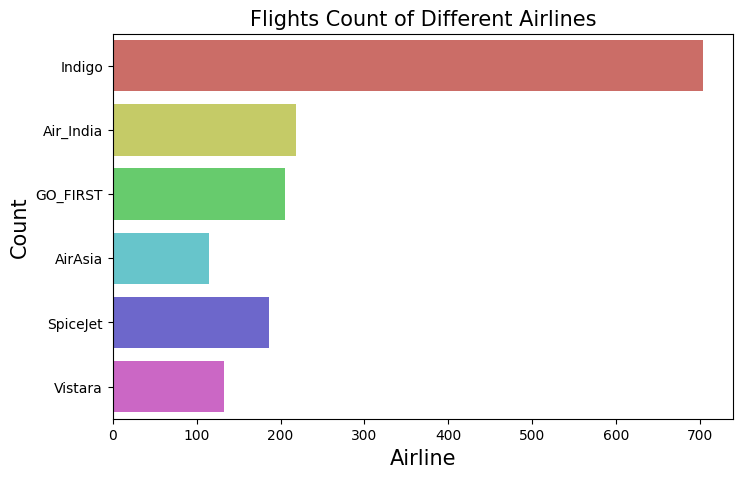

In [8]:
#Indigo becaming as a most popular Airline
plt.figure(figsize=(8,5))
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [9]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()
df2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

In [10]:
#Most of the Airlines has Economic Class as common

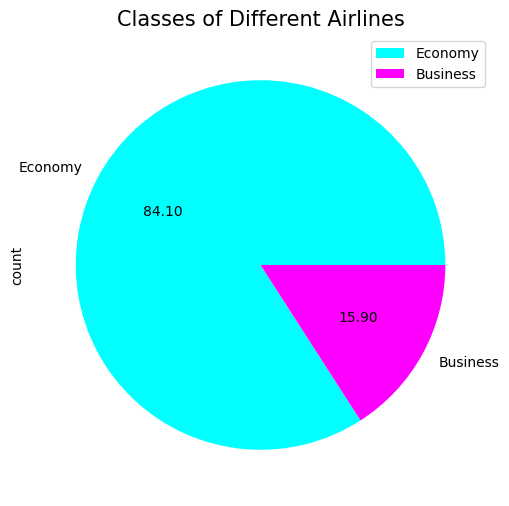

In [11]:
plt.figure(figsize=(8,6))
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

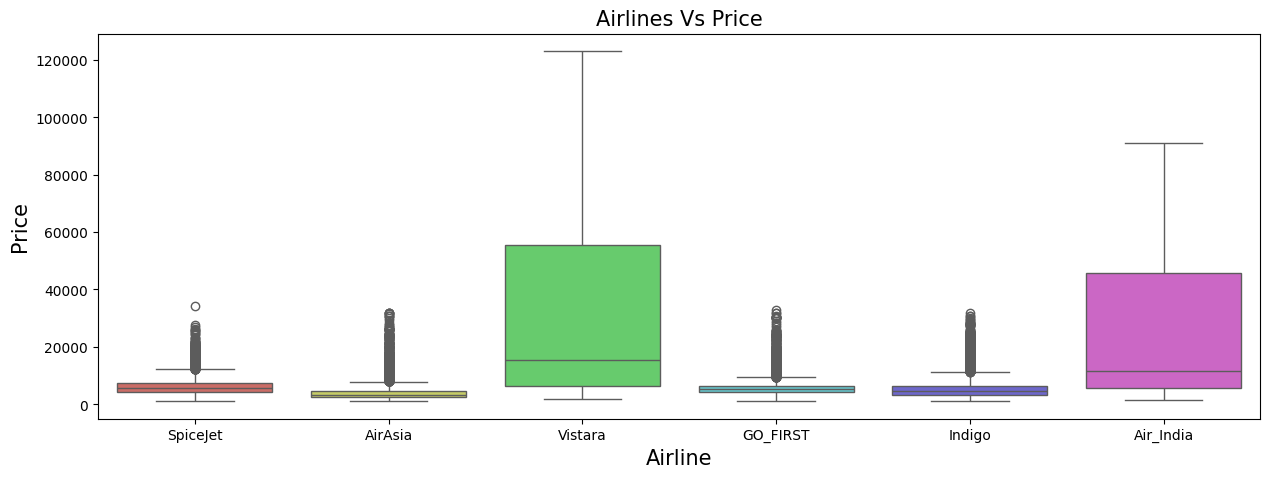

In [12]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

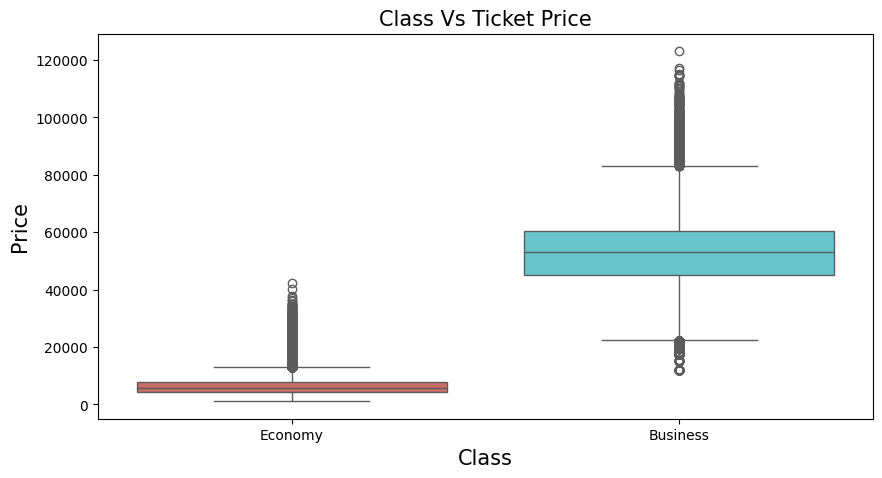

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

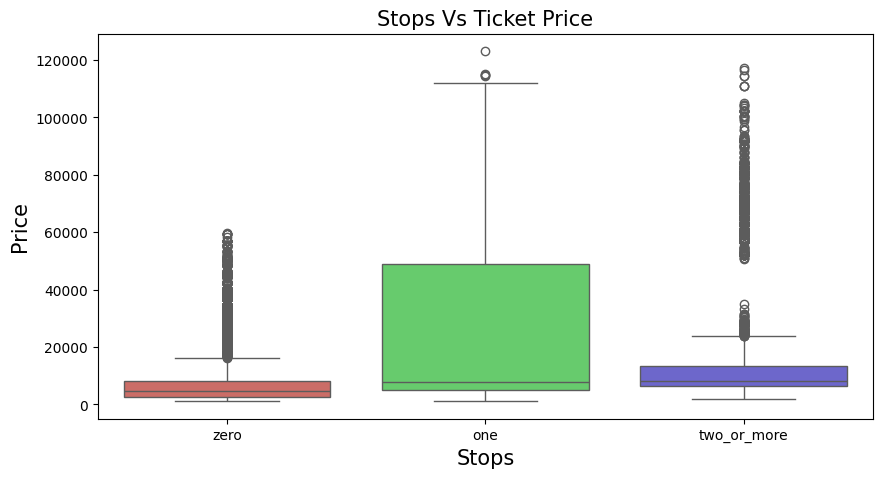

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

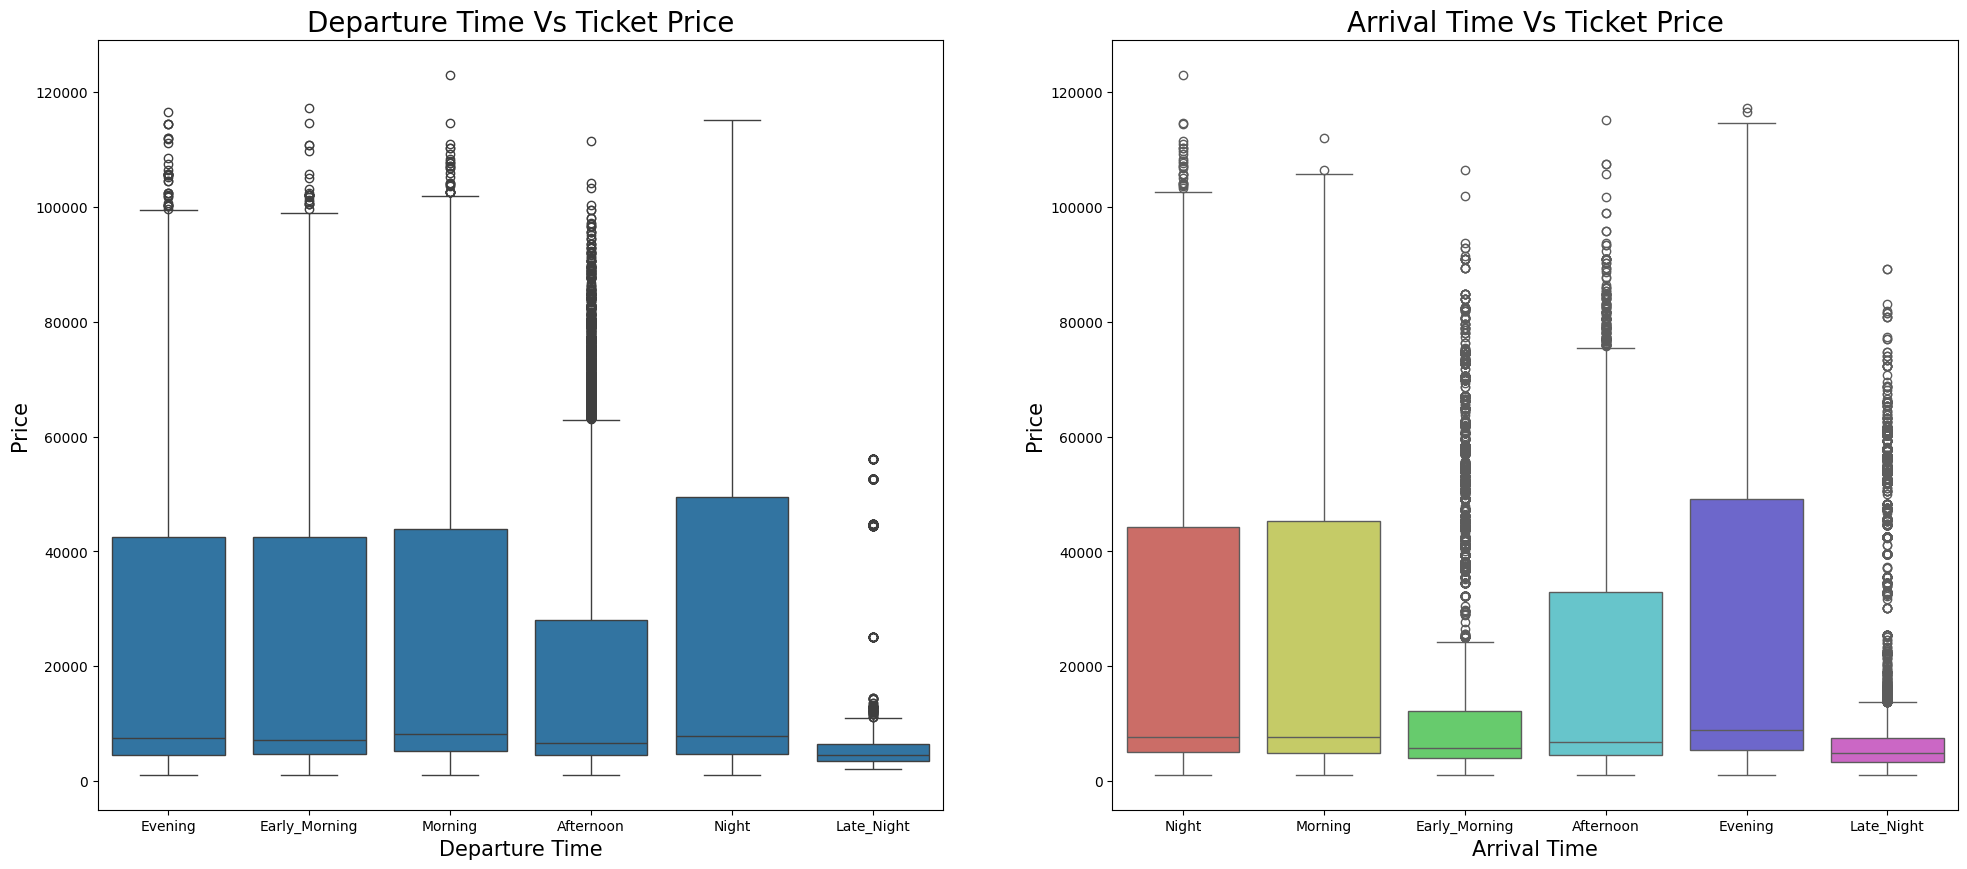

In [15]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

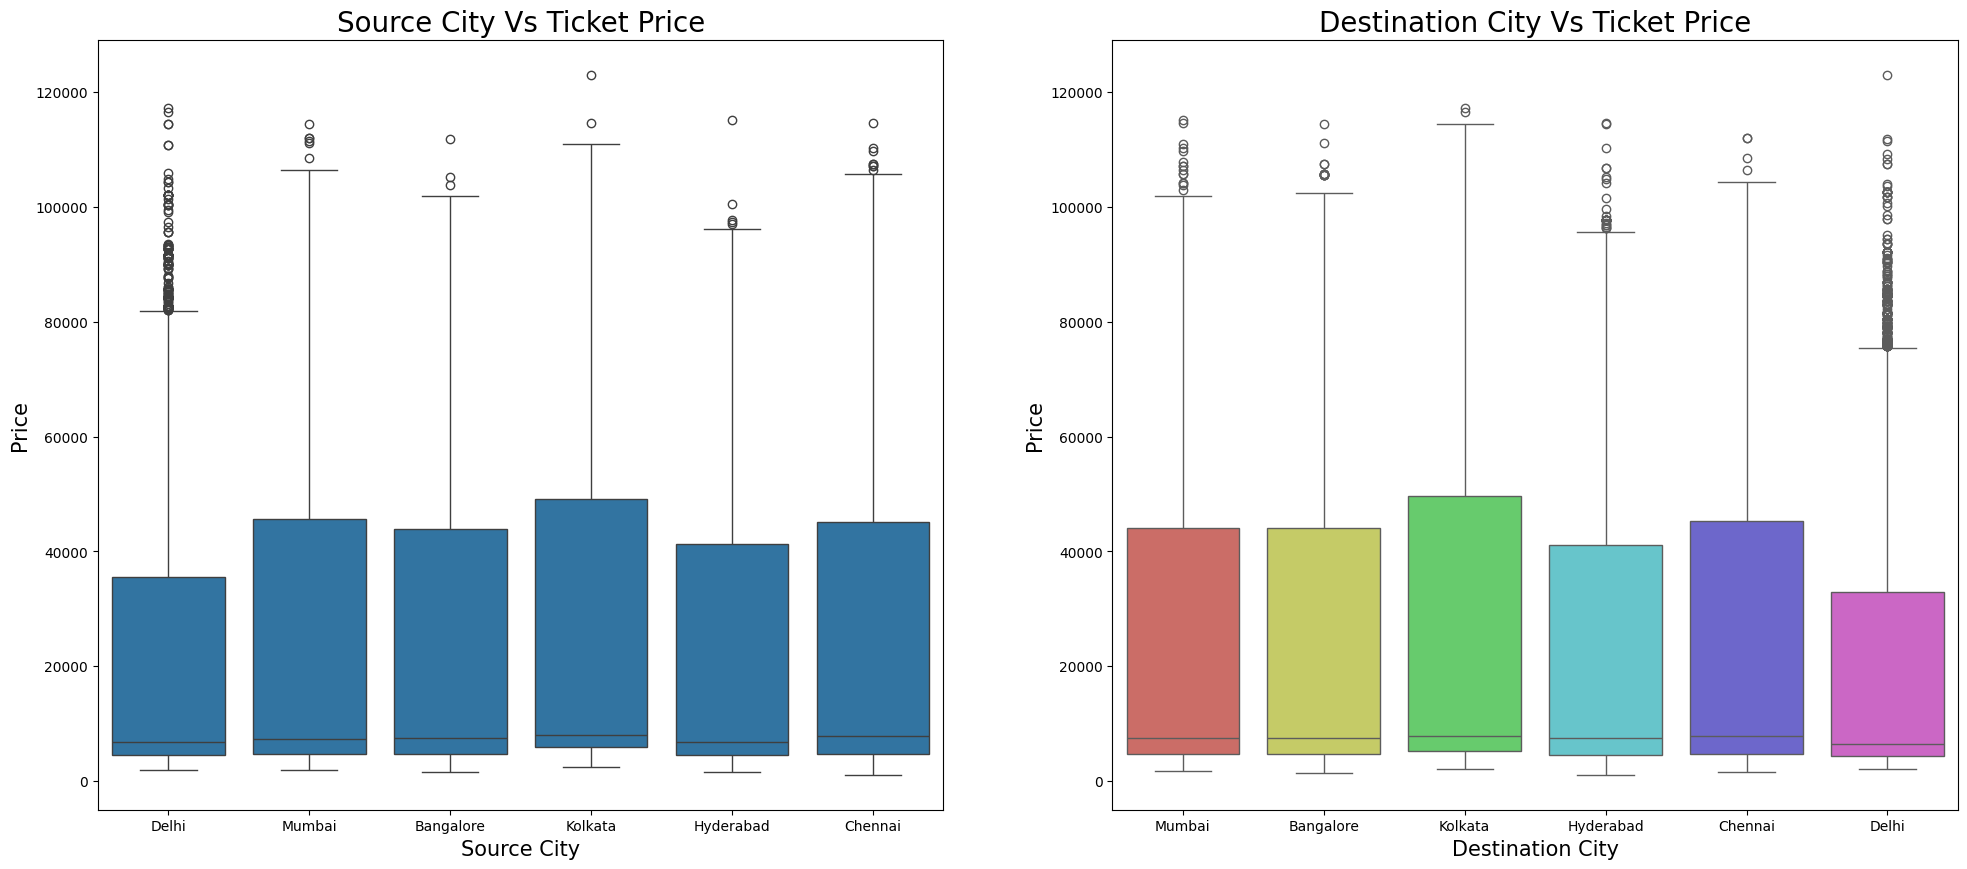

In [16]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=df)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

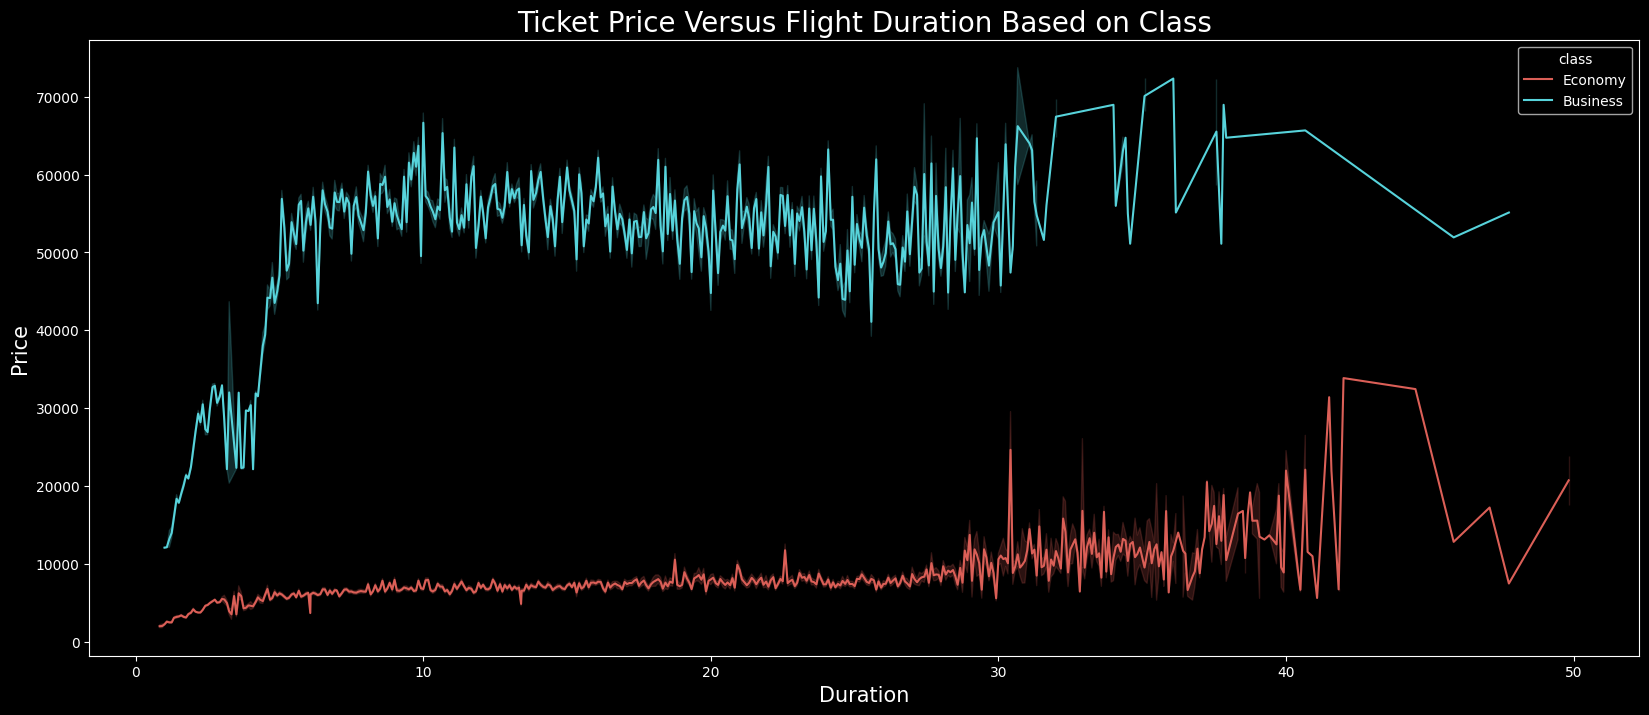

In [17]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

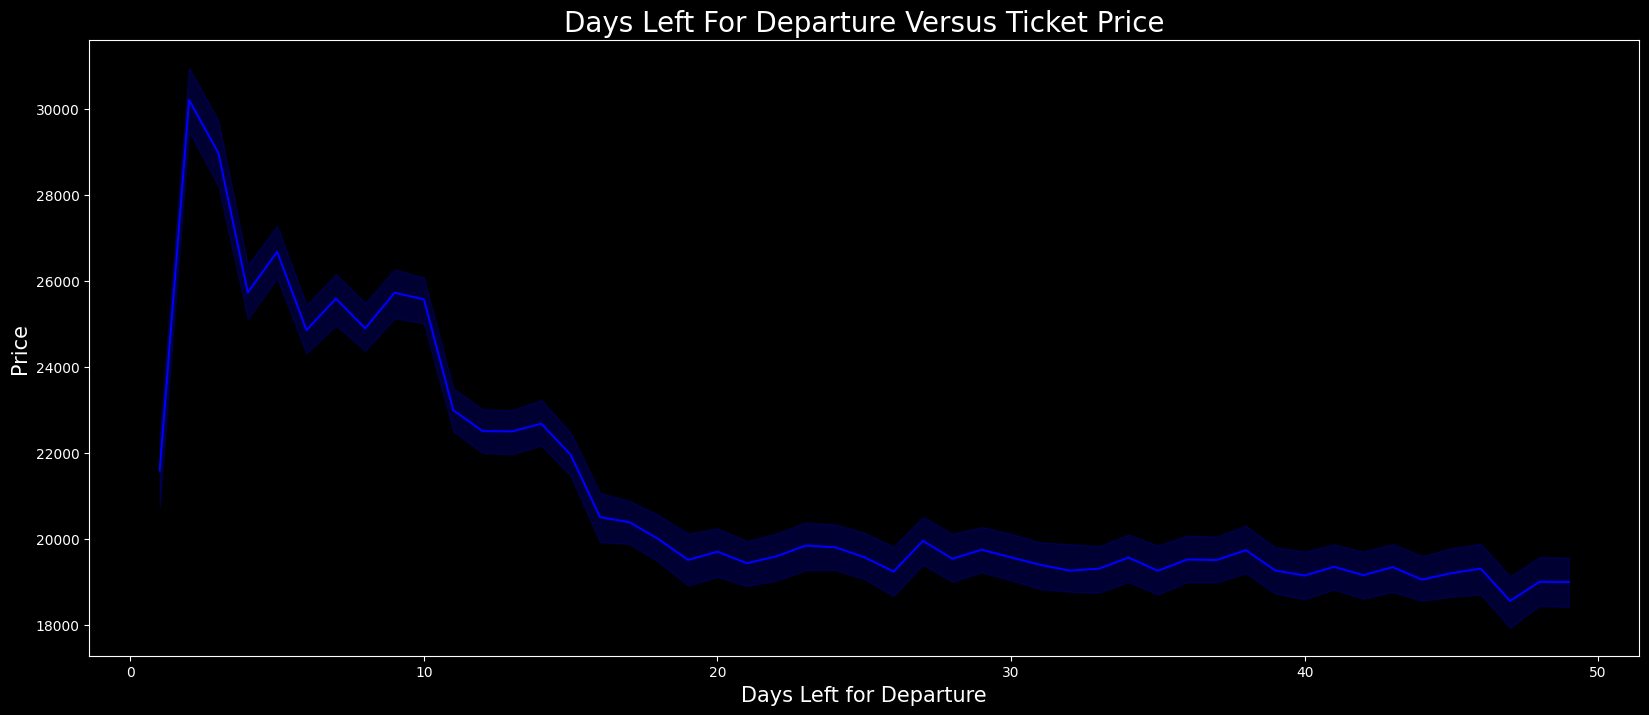

In [18]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

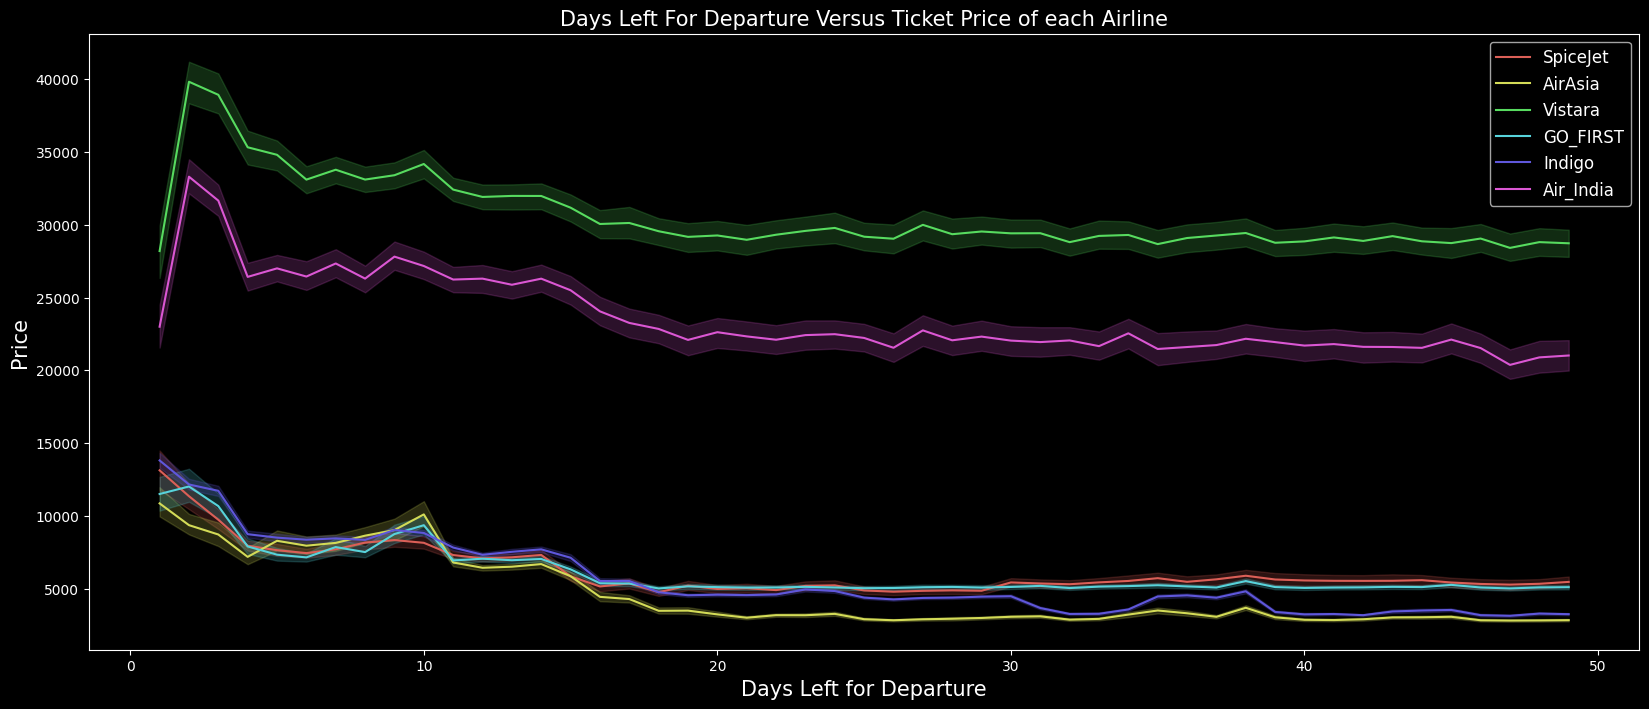

In [19]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [20]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [21]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [22]:
# Creating a Back up File
df_bk=df.copy()

In [23]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [24]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['price'],axis=1)
y=df['price']

In [25]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [31]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [32]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [34]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)
modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    import pandas as pd
    Results = pd.concat([Results, pd.DataFrame([new_row])], ignore_index=True)

    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1270.674
Mean Squared Error (MSE): 14012980.306
Root Mean Squared Error (RMSE): 3743.392
R2_score: 0.972773
Root Mean Squared Log Error (RMSLE): 8.228
Mean Absolute Percentage Error (MAPE): 8.66 %
Adj R Square:  0.972772
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1172.282
Mean Squared Error (MSE): 8228203.693
Root Mean Squared Error (RMSE): 2868.485
R2_score: 0.984013
Root Mean Squared Log Error (RMSLE): 7.962
Me

In [29]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4630.295614,0.904653,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
1,DecisionTreeRegressor(),1267.046858,0.972946,3731.414789,8.636776,1.392346e+07,8.224543,0.972947
2,"(DecisionTreeRegressor(max_features=1.0, rando...",1171.195628,0.984113,2859.347334,7.910083,8.175867e+06,7.958349,0.984114
3,KNeighborsRegressor(),1854.469527,0.971645,3820.074173,11.113824,1.459297e+07,8.248025,0.971646
4,"(ExtraTreeRegressor(random_state=370408196), E...",1148.979440,0.984726,2803.632993,7.629837,7.860358e+06,7.938671,0.984727
5,([DecisionTreeRegressor(criterion='friedman_ms...,2808.074076,0.956823,4713.930286,20.673080,2.222114e+07,8.458277,0.956824
6,"XGBRegressor(base_score=None, booster=None, ca...",1862.407227,0.977303,3417.712978,14.232981,1.168076e+07,8.136727,0.977304
7,(DecisionTreeRegressor(random_state=510902622)...,1210.905216,0.982816,2973.788019,8.290388,8.843415e+06,7.997592,0.982817
8,Ridge(),4630.313301,0.904653,7005.011583,43.888754,4.907019e+07,8.854381,0.904656
9,Lasso(alpha=0.1),4630.179207,0.904653,7005.006183,43.885459,4.907011e+07,8.854380,0.904656


In [30]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.984726,1148.979440,2803.632993,7.629837,7.860358e+06,7.938671,0.984727
1,RandomForestRegressor,0.984113,1171.195628,2859.347334,7.910083,8.175867e+06,7.958349,0.984114
2,BaggingRegressor,0.982816,1210.905216,2973.788019,8.290388,8.843415e+06,7.997592,0.982817
3,XGBRegressor,0.977303,1862.407227,3417.712978,14.232981,1.168076e+07,8.136727,0.977304
4,DecisionTreeRegressor,0.972946,1267.046858,3731.414789,8.636776,1.392346e+07,8.224543,0.972947
5,KNeighborsRegressor,0.971645,1854.469527,3820.074173,11.113824,1.459297e+07,8.248025,0.971646
6,GradientBoostingRegressor,0.956823,2808.074076,4713.930286,20.673080,2.222114e+07,8.458277,0.956824
7,LinearRegression,0.904653,4630.295614,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
8,Ridge Regression,0.904653,4630.313301,7005.011583,43.888754,4.907019e+07,8.854381,0.904656
9,Lasso Regression,0.904653,4630.179207,7005.006183,43.885459,4.907011e+07,8.854380,0.904656


In [35]:
#Trainig the model with
modelETR.fit(x_train, y_train)
    
# Predict the model with test data

y_pred = modelETR.predict(x_test)

In [36]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [37]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
172088,GO_FIRST,G8-123,Hyderabad,Early_Morning,zero,Early_Morning,Kolkata,Economy,1.83,15,5292,5292,5431.45
172328,AirAsia,I5-510,Hyderabad,Early_Morning,one,Afternoon,Kolkata,Economy,6.00,17,2056,2056,3579.41
267403,Vistara,UK-772,Kolkata,Morning,one,Morning,Bangalore,Business,22.42,3,75023,75023,68566.20
151587,Indigo,6E-345,Kolkata,Morning,one,Evening,Chennai,Economy,10.00,39,3015,3015,3315.70
226901,Vistara,UK-841,Mumbai,Morning,one,Evening,Delhi,Business,5.67,20,60813,60813,54000.05
157140,Indigo,6E-7156,Hyderabad,Afternoon,one,Night,Delhi,Economy,6.17,39,3243,3243,3669.54
263123,Air_India,AI-773,Kolkata,Evening,one,Morning,Delhi,Business,17.50,34,53743,53743,53743.00
260667,Vistara,UK-864,Bangalore,Evening,one,Evening,Chennai,Business,24.92,38,44280,44280,44354.27
26986,AirAsia,I5-721,Delhi,Night,one,Morning,Kolkata,Economy,12.25,40,3175,3175,2621.60
157987,Vistara,UK-874,Hyderabad,Morning,one,Late_Night,Delhi,Economy,16.42,45,5656,5656,5652.85


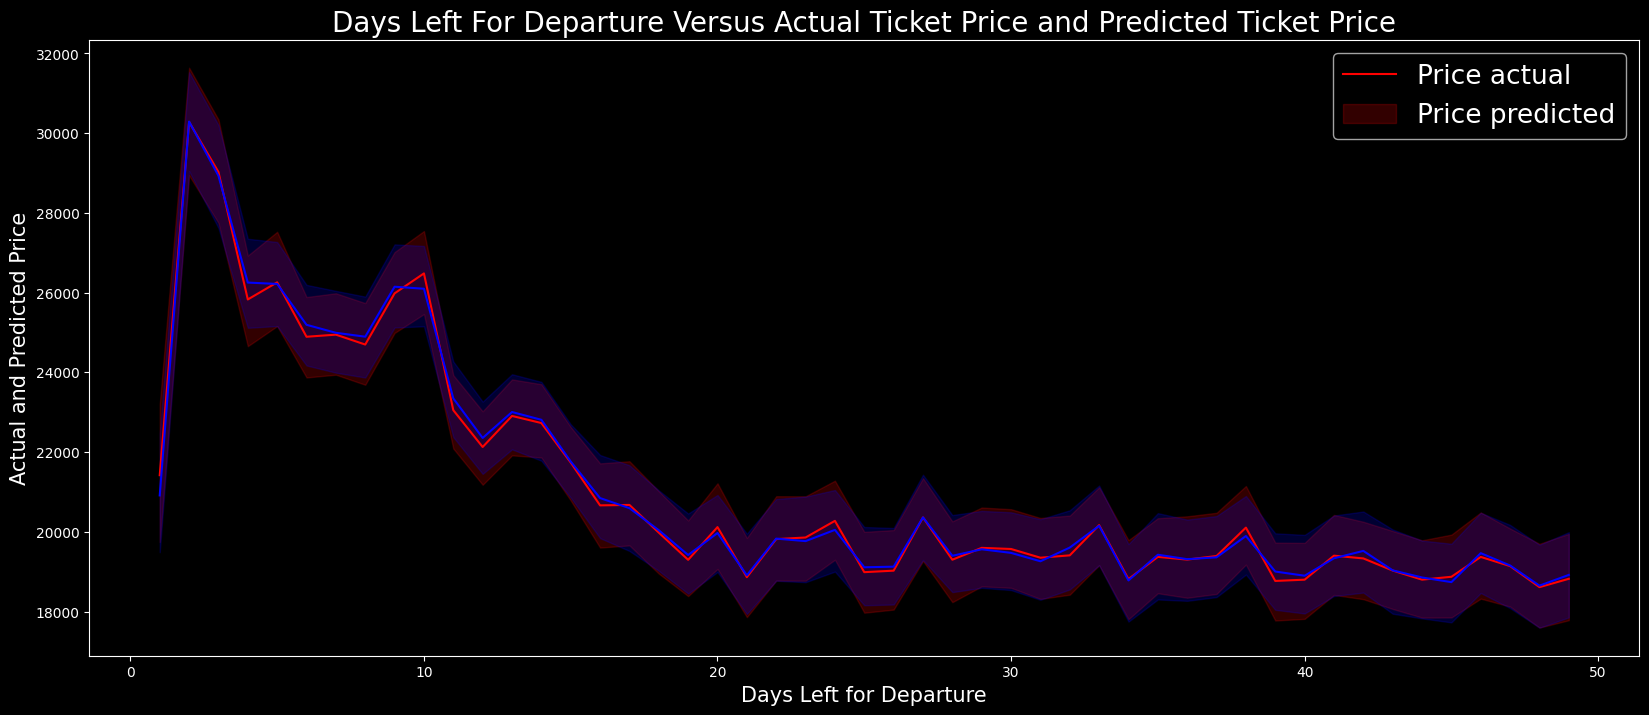

In [38]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

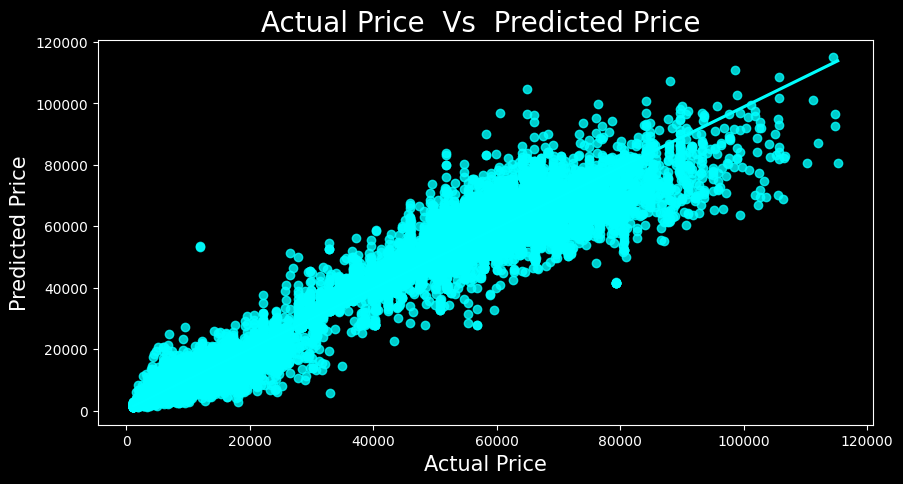

In [39]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [40]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  # Import LinearRegression

# Initialize Results DataFrame
Results = pd.DataFrame(columns=[
    'Model Name', 'Mean_Absolute_Error_MAE', 'Adj_R_Square', 
    'Root_Mean_Squared_Error_RMSE', 'Mean_Absolute_Percentage_Error_MAPE', 
    'Mean_Squared_Error_MSE', 'Root_Mean_Squared_Log_Error_RMSLE', 'R2_score'])

# Iterate through each model in the MM list
for models in MM:
    # Check if the current model is LinearRegression
    if isinstance(models, LinearRegression):
        # Fit the model with train data
        models.fit(x_train, y_train)
        
        # Predict the model with test data
        y_pred = models.predict(x_test)
        
        # Model evaluation
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        # Calculate MAPE (Mean Absolute Percentage Error)
        def MAPE(y_test, y_pred):
            y_test, y_pred = np.array(y_test), np.array(y_pred)
            return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        
        mape = MAPE(y_test, y_pred)
        
        # Adjusted R-Square calculation
        adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
        
        # RMSLE calculation
        rmsle = np.log(np.sqrt(mse))
        
        # Print evaluation metrics
        print(f"Model Name: {models}")
        print(f"Mean Absolute Error (MAE): {mae:.3f}")
        print(f"Mean Squared Error (MSE): {mse:.3f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
        print(f"R2 Score: {r2:.6f}")
        print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
        print(f"Root Mean Squared Log Error (RMSLE): {rmsle:.3f}")
        print("-" * 100)

        # Prepare new row as a DataFrame
        new_row = pd.DataFrame({
            'Model Name': [str(models)],
            'Mean_Absolute_Error_MAE': [mae],
            'Adj_R_Square': [adj_r2],
            'Root_Mean_Squared_Error_RMSE': [rmse],
            'Mean_Absolute_Percentage_Error_MAPE': [mape],
            'Mean_Squared_Error_MSE': [mse],
            'Root_Mean_Squared_Log_Error_RMSLE': [rmsle],
            'R2_score': [r2]
        })
        
        # Concatenate the new row with the existing Results DataFrame
        Results = pd.concat([Results, new_row], ignore_index=True)

# After the loop, you can check the Results DataFrame
print(Results)

Model Name: LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2 Score: 0.904656
Mean Absolute Percentage Error (MAPE): 43.89%
Root Mean Squared Log Error (RMSLE): 8.854
----------------------------------------------------------------------------------------------------
           Model Name  Mean_Absolute_Error_MAE  Adj_R_Square  \
0  LinearRegression()              4630.295614      0.904646   

   Root_Mean_Squared_Error_RMSE  Mean_Absolute_Percentage_Error_MAPE  \
0                   7005.015436                            43.888567   

   Mean_Squared_Error_MSE  Root_Mean_Squared_Log_Error_RMSLE  R2_score  
0            4.907024e+07                           8.854382  0.904656  


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

# Load a dataset (example: Iris dataset)
data = load_iris()
X = data.data  # Feature data
y = data.target  # Target labels

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# List of models to train (in this case, Naive Bayes)
MM = [GaussianNB()]

# Iterate through each model in the MM list
for model in MM:
    # Fit the model with train data
    model.fit(x_train, y_train)
    
    # Predict the model with test data
    y_pred = model.predict(x_test)
    
    # Print or evaluate the results (you can add metrics like accuracy, etc.)
    print(f'Model: {model.__class__.__name__}')
    print(f'Predictions: {y_pred}')


Model: GaussianNB
Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 97.78%
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


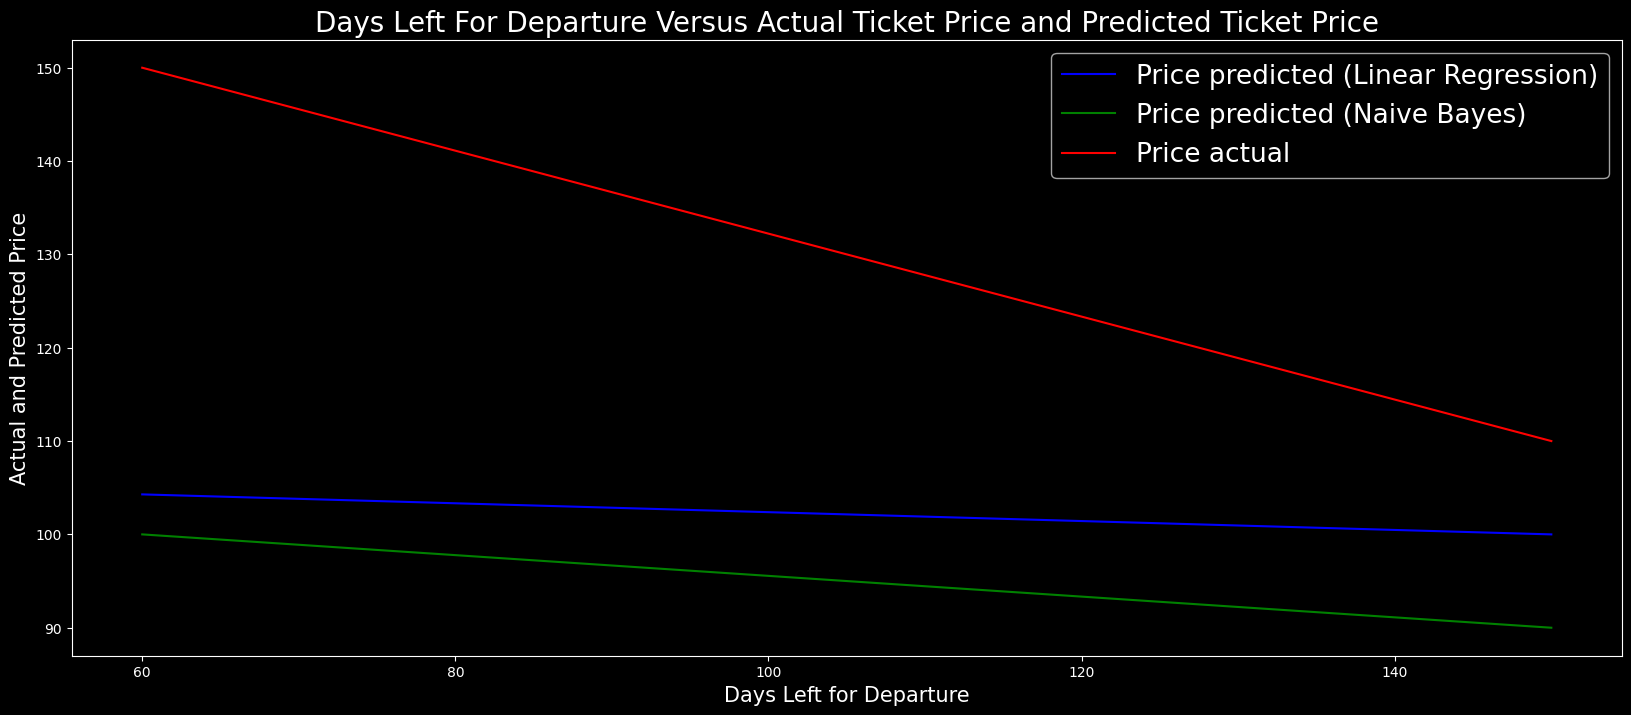

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Example DataFrame 'result' (replace this with your actual data)
import pandas as pd

result = pd.DataFrame({
    'days_left': [30, 60, 90, 120, 150],  # Example days_left
    'Price_actual': [100, 150, 120, 90, 110]  # Example actual prices
})

# Prepare the data
X = result[['days_left']]  # Feature: 'days_left'
y = result['Price_actual']  # Target: 'Price_actual'

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

# Fit the Naive Bayes model (GaussianNB is generally used for classification)
nb_model = GaussianNB()
y_train_nb = y_train.astype(int)  # Naive Bayes expects integer labels
nb_model.fit(x_train, y_train_nb)
y_pred_nb = nb_model.predict(x_test)

# Plotting the results
plt.figure(figsize=(20, 8))

# Plot Linear Regression predictions
sns.lineplot(x=x_test['days_left'], y=y_pred_lr, color='blue', label='Price predicted (Linear Regression)')

# Plot Naive Bayes predictions
sns.lineplot(x=x_test['days_left'], y=y_pred_nb, color='green', label='Price predicted (Naive Bayes)')

# Plot actual prices for the test set
sns.lineplot(x=x_test['days_left'], y=y_test, color='red', label='Price actual')

# Title and labels
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price', fontsize=20)
plt.xlabel('Days Left for Departure', fontsize=15)
plt.ylabel('Actual and Predicted Price', fontsize=15)

# Show legend
plt.legend(fontsize=19)

# Display the plot
plt.show()


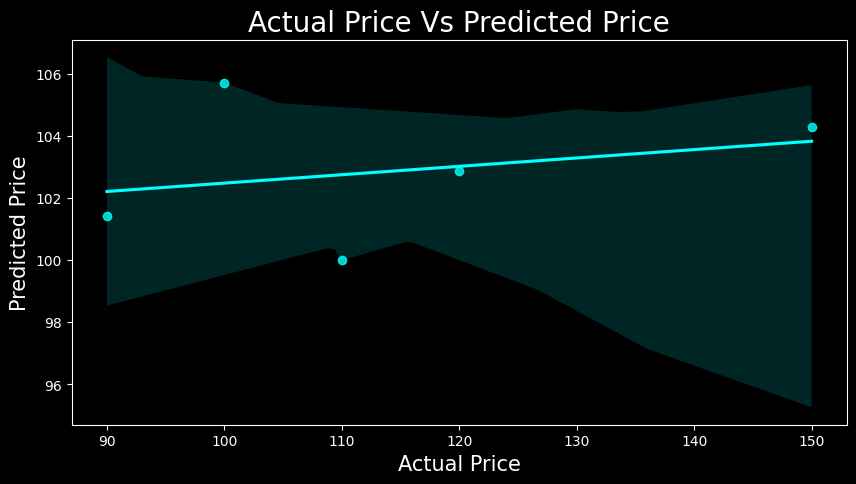

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Example DataFrame 'result' (replace this with your actual data)
import pandas as pd

result = pd.DataFrame({
    'days_left': [30, 60, 90, 120, 150],  # Example days_left
    'Price_actual': [100, 150, 120, 90, 110]  # Example actual prices
})

# Prepare the data
X = result[['days_left']]  # Feature: 'days_left'
y = result['Price_actual']  # Target: 'Price_actual'

# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

# Fit the Naive Bayes model (GaussianNB is generally used for classification)
nb_model = GaussianNB()
y_train_nb = y_train.astype(int)  # Naive Bayes expects integer labels
nb_model.fit(x_train, y_train_nb)
y_pred_nb = nb_model.predict(x_test)

# Add the predictions to the 'result' DataFrame (for comparison)
# Assuming you're interested in the Linear Regression predictions
result['Price_pred'] = lr_model.predict(X)

# Plotting the Actual vs Predicted prices
plt.figure(figsize=(10, 5))
sns.regplot(x='Price_actual', y='Price_pred', data=result, color='cyan')
plt.title('Actual Price Vs Predicted Price', fontsize=20)
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.show()
